In [1]:
!pip install tigramite==5.2.1.30
!pip install numpy==1.23.5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr

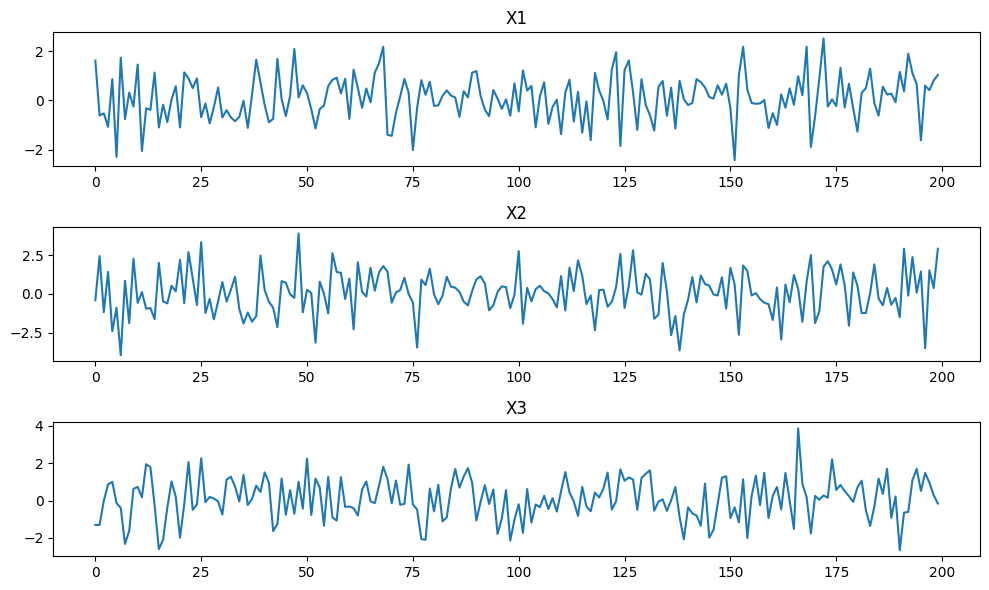

In [3]:
# サンプルデータの生成
np.random.seed(1)
data_length = 200

# X1はノイズから生成
X1 = np.random.randn(data_length)

# X2はX1の1時点前のデータに依存し、1.0倍の値を持つ
X2 = np.empty(data_length)
X2[0] = np.random.randn()
for t in range(1, data_length):
  X2[t] = 1.0 * X1[t-1] + np.random.randn()

# X3はX2の2時点前のデータに依存し、0.2倍の値を持つ
X3 = np.empty(data_length)
X3[0] = X3[1] = np.random.randn()
for t in range(2, data_length):
  X3[t] = 0.2 * X2[t-2] + np.random.randn()

data = np.column_stack([X1, X2, X3])

# データの可視化
xiables = [X1, X2, X3]
titles = ['X1', 'X2', 'X3']
plt.figure(figsize=(10, 6))
for i, (x, title) in enumerate(zip(xiables, titles)):
  plt.subplot(3, 1, i+1)
  plt.plot(x)
  plt.title(title)

plt.tight_layout()
plt.show()

In [4]:
# DataFrameオブジェクトの作成
dataframe = pp.DataFrame(data)

# ParCorrを使用してPCMCI+をインスタンス化
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=ParCorr(significance='analytic'))
results = pcmci.run_pcmciplus(tau_min=0, tau_max=2, pc_alpha=0.05)#最小のラグを0(同時期の因果関係も考慮)、最大のラグを2とし、PC1アルゴリズムの有意水準αを0.05に設定

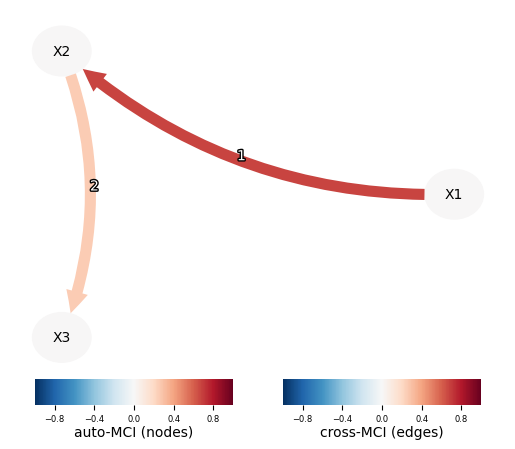

In [5]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=["X1", "X2", "X3"],
    link_colorbar_label='cross-MCI (edges)',
    node_colorbar_label='auto-MCI (nodes)',
    ); plt.show()